In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Regression

#### Load data

In [6]:
data = np.loadtxt("Data/data_w3_ex1.csv", delimiter=",")
print(data[:5])

[[1651.          432.64521724]
 [1691.81632653  454.93552962]
 [1732.63265306  471.52524758]
 [1773.44897959  482.50638875]
 [1814.26530612  468.35788634]]


#### Split the inputs and outputs

In [7]:
x = data[:,0]
y = data[:,1]

print(x.shape, y.shape)

(50,) (50,)


#### Convert 1-D arrays into 2-D

In [8]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"The shape of the inputs x is: {x.shape}")
print(f"The shape of the outputs y is: {y.shape}")

The shape of the inputs x is: (50, 1)
The shape of the outputs y is: (50, 1)


#### Data visualization

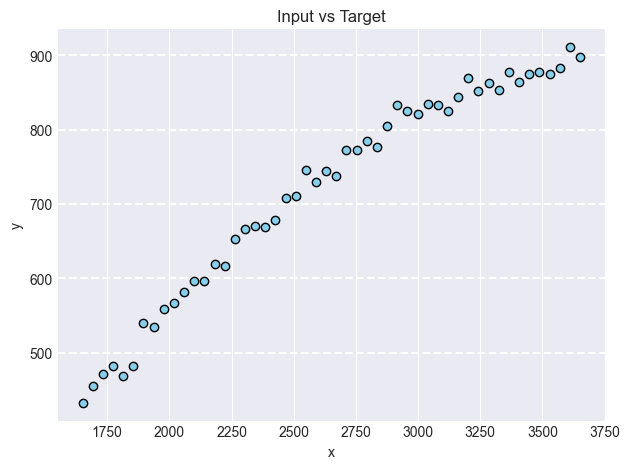

In [15]:
plt.style.use("seaborn-v0_8-darkgrid")

plt.scatter(x, y, color="skyblue", marker="o", edgecolors="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input vs Target")
plt.grid(True, axis="y", linestyle="--", linewidth=1.5)
plt.tight_layout()
plt.show()

#### Split the dataset into training, cross validation, and test sets

In [16]:
X_train, X_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=1)

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)

del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


#### Data visualization

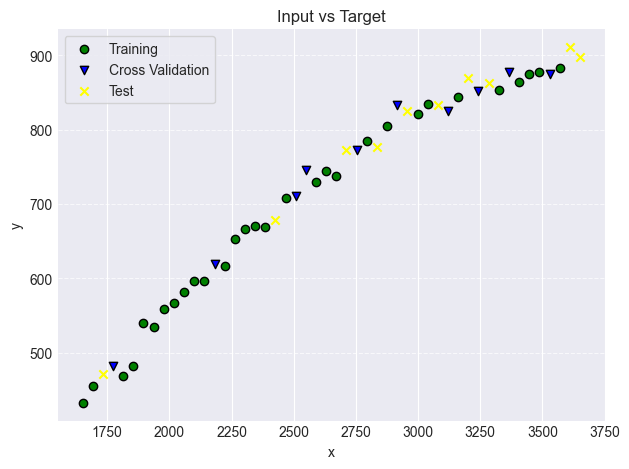

In [21]:
plt.scatter(X_train, y_train, color="green", marker="o", edgecolors="black", label="Training")
plt.scatter(X_cv, y_cv, color="blue", marker="v", edgecolors="black", label="Cross Validation")
plt.scatter(X_test, y_test, color="yellow", marker="x", label="Test")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Input vs Target")
plt.legend(frameon=True)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

#### Fit a linear model

##### Feature Scaling
We use the z-score to scale data, it is given by the equation:
$$
z = \frac{x - \mu}{\sigma}
$$

In [37]:
scaler_linear = StandardScaler()

X_train_scaled = scaler_linear.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


##### Data visualization after feature scaling

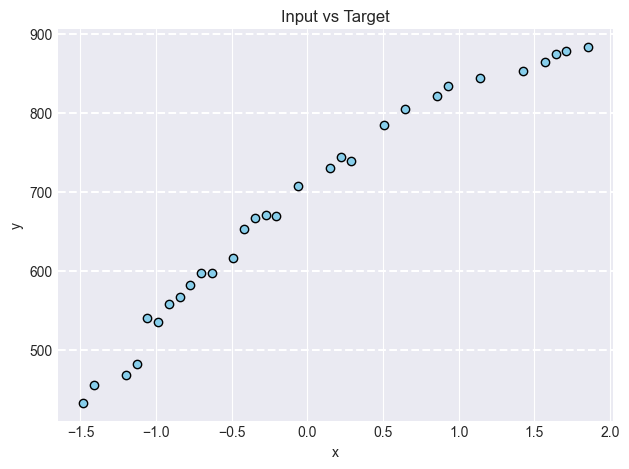

In [38]:
plt.scatter(X_train_scaled, y_train, color="skyblue", marker="o", edgecolors="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input vs Target")
plt.grid(True, axis="y", linestyle="--", linewidth=1.5)
plt.tight_layout()
plt.show()

##### Train the model

In [39]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

LinearRegression()

##### Evaluate model

In [40]:
yhat = linear_model.predict(X_train_scaled)

print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

total_square_error = np.sum((yhat - y_train)**2)

mse = total_square_error / (2 * len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.19374192533155
training MSE (for-loop implementation): 406.19374192533155


##### Cost loss in validation set

In [41]:
X_cv_scaled = scaler_linear.transform(X_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

yhat = linear_model.predict(X_cv_scaled)

print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


#### Adding Polynomial Features

##### Create the additional features

In [42]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_mapped = poly.fit_transform(X_train)

print(X_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


##### Feature scaling

In [48]:
scaler_poly = StandardScaler()

X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

print(f"Mean used to scale the training set: {scaler_poly.mean_.squeeze()}")
print(f"Standard deviation used to scale the training set: {scaler_poly.scale_.squeeze()}")

print(X_train_mapped_scaled[:5])

Mean used to scale the training set: [2.50406122e+03 6.60077937e+06]
Standard deviation used to scale the training set: [5.74853681e+02 3.02323580e+06]
[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]


##### Train the model

In [50]:
model = LinearRegression()

model.fit(X_train_mapped_scaled, y_train)

yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(X_cv)

X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025154
Cross validation MSE: 87.6984121111191


#### Model selection

In [52]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1, 11):
    # Add polynomial features to the training data
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)

    # Scale the training set
    scaler = StandardScaler()
    X_train_mapped_scale = scaler.fit_transform(X_train_mapped)
    scalers.append(scaler)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scale, y_train)
    models.append(model)

    # Computing the training MSE
    yhat = model.predict(X_train_mapped_scale)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(X_cv)
    X_cv_mapped_scaled = scaler.transform(X_cv_mapped)

    # Computing the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

##### Visualization

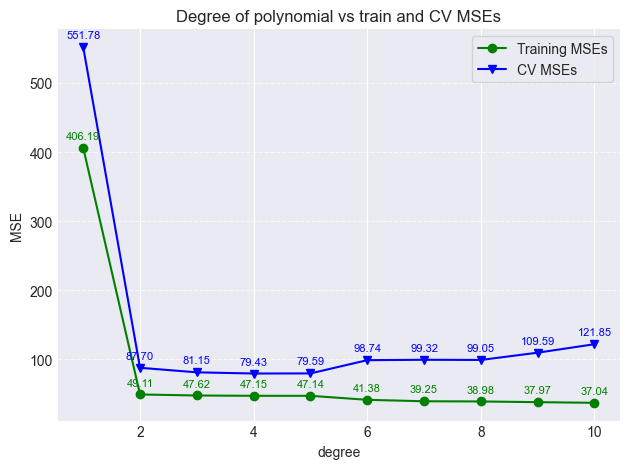

In [62]:
degrees = range(1, 11)

plt.plot(degrees, train_mses, color="green", marker="o", label="Training MSEs")
plt.plot(degrees, cv_mses, color="blue", marker="v", label="CV MSEs")

for x, y in zip(degrees, train_mses):
    plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=8, color="green")

for x, y in zip(degrees, cv_mses):
    plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=8, color="blue")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.title("Degree of polynomial vs train and CV MSEs")
plt.legend(loc="best", frameon=True)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

##### Choosing the best model

In [63]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [65]:
X_test_mapped = polys[degree - 1].transform(X_test)

X_test_mapped_scaled = scalers[degree - 1].transform(X_test_mapped)

yhat = models[degree - 1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63
